
# Visualización de datos: 1.- Introducción a matplotlib

## Carga de datos y preparación de los dataframes

In [2]:
# INHIBIENDO WARNINGS
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

In [43]:
covid = pd.read_csv('Datos/covid_19.csv', sep = ';')

print(covid.dtypes)
print()
covid['Date'] = pd.to_datetime(covid['Date'])
print(covid.dtypes)
spain = covid[covid['Country/Region'] == 'Spain']
# spain.to_csv('covid_19_spain.csv', sep = ';', index = False)

Country/Region    object
Date              object
Confirmed          int64
Deaths             int64
dtype: object

Country/Region            object
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
dtype: object


In [21]:
spain = spain.sort_values('Date')
#spain['Day'] = range(1,len(spain) + 1)

## Importación de la librería para gráficos

In [9]:
import matplotlib.pyplot as plt

## Documentación sobre la librería

**Documentación** adicional

http://matplotlib.org/api/pyplot_summary.html

http://matplotlib.org/gallery.html

## Gráfico de líneas: plt.plot()

A continuación, pintaremos el número de casos confirmados por Covid-19 en España, para cada día.

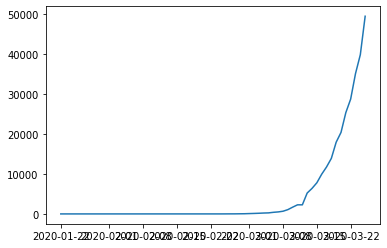

In [24]:
x_values = spain.Date
y_values = spain.Confirmed
plt.plot(x_values, y_values)
plt.show()

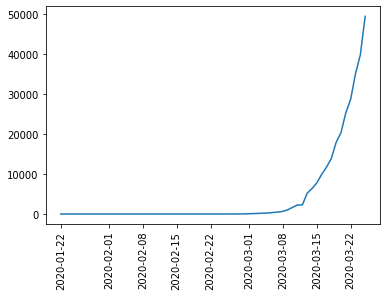

In [25]:
plt.xticks(rotation='vertical') #Rotamos los ticks para poder visualizar las fechas mejor
plt.plot(x_values, y_values)
plt.show()

### Un gráfico con más componentes

Para comprender cuál es la filosofía de trabajo con matplotlib vamos a tratar de crear un **gráfico un poco más completo**. 

Este gráfico tendrá:


   - Una **serie** que contenga el número de **casos confirmados**.

   - Una **serie** que contenga el número de **fallecidos**.
    
   - **Nombres** en ambos **ejes**.
    
   - Una **leyenda** que indique qué linea representa cada función.
   
   - **Cuadros de división** para visualizar mejor las escalas.
   
   - **Título** de gráfico.



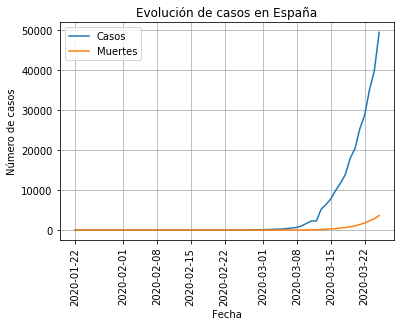

In [31]:
plt.plot(spain['Date'].values,spain['Confirmed'].values,label='Casos')
plt.plot(spain['Date'].values,spain['Deaths'].values,label='Muertes')
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.grid()
plt.legend()
plt.title('Evolución de casos en España')
plt.xticks(rotation='vertical')
plt.show()

### Parámetros

Se trata del tipo de gráfico "por defecto" de matplotlib. Se crean mediante la función <b>plot</b>.

Según la documentación, esta función recibe dos parámetros:

<ul>
<li>Parámetro <b>args</b>: Se trata de un conjunto arbitrario de grupos de parámetros con la forma x, y, z, donde:
<ul>
    <li>x: Contiene el conjunto de valores a usar en el eje de las X.</li>
    <li>y: Contiene el conjunto de valores a usar en el eje de las Y.</li>
    <li>z: Contiene una cadena que especifica el formato de la línea.</li>
</ul>
</li>
<li>Parámetro <b>kwargs</b>: Se trata de un conjunto arbitrario de parámetros que permiten establecer de forma global el estilo de las líneas incluidas en el gráfico.
</ul>

En este <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">enlace</a> se puede encontrar la especificación completa de valores posibles tanto para las cadenas de formato del parámetro <b>args</b> como de parámetros disponibles para su configuración el parámetro <b>kwargs</b>.

### Modificando el estilo

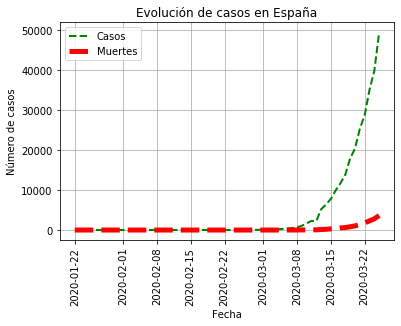

In [34]:
#CAMBIANDO EL ESTILO
plt.plot(spain['Date'].values,spain['Confirmed'].values,label='Casos',color='g',linestyle='dashed',linewidth=2)
plt.plot(spain['Date'].values,spain['Deaths'].values,label='Muertes',color='r',linestyle='dashed',linewidth=5)
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.grid()
plt.legend()
plt.title('Evolución de casos en España')
plt.xticks(rotation='vertical')

plt.show()

## Gráfico de puntos: plt.scatter()

Uno de los gráficos más utilizados es el denominado gráfico de puntos o scatter plot. En este caso, matplotlib nos ofrece la función <b>scatter</b>. Esta función recibirá, como mínimo, un conjunto de valores para el eje de las X y un conjunto de valores para el eje de las Y. 

Adicionalmente, pone a nuestra disposición un conjunto de parámetros que nos permitirán controlar diferentes características visuales de los puntos representados: tamaño, alpha, color, tipo de punto... 

**Documentación**:

"http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter"

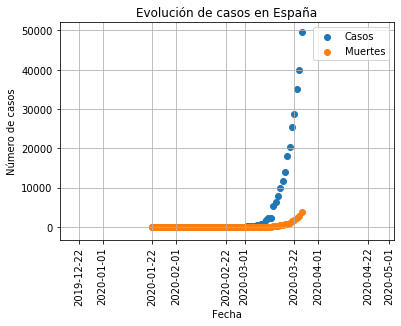

In [52]:
plt.scatter(spain['Date'].values,spain['Confirmed'].values,label='Casos')
plt.scatter(spain['Date'].values,spain['Deaths'].values,label='Muertes')
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.grid()
plt.legend()
plt.title('Evolución de casos en España')
plt.xticks(rotation='vertical')
plt.show()

## Gráfico de barras: plt.bar()

Para la creación de gráficos de barra, matplotlib pone a nuestra disposición dos funciones: <b>bar</b> y <b>barh</b> (en función de la orientación que queramos dar al gráfico). Para su creación tendremos que pasar, de nuevo, el conjunto de valores del eje X y el conjunto de valores del eje Y.

Adicionalmente, como ocurre con gráficos anteriores, dispondremos de parámetros específicos para controlar las diferentes características visuales: barras centradas en su valor, ancho de las barras, ticks a utilizar en cada una de las barras...

**Documentación:**

"http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar">

In [48]:
covid.head()

,Country/Region,Date,Confirmed,Deaths,Month
0,Afghanistan,2020-01-22,0,0,1
1,Albania,2020-01-22,0,0,1
2,Algeria,2020-01-22,0,0,1
3,Andorra,2020-01-22,0,0,1
4,Angola,2020-01-22,0,0,1


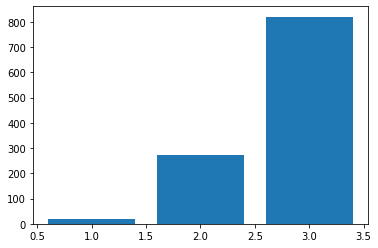

In [53]:
# Gráfico de barras con la media casos por mes (englobando a todos los países)

covid['Month'] = covid.Date.apply(lambda x: x.month) # Se crea una nueva columna 'Month' en la que se extrae el mes de la fecha
covid_mean = covid.groupby('Month', as_index = False).mean()

plt.bar(covid_mean.Month,covid_mean.Confirmed)

plt.show()

### Formato

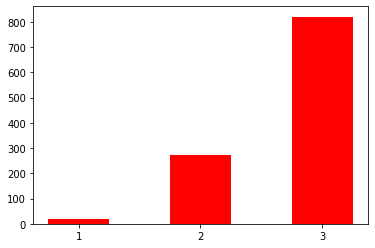

In [56]:
# Establecemos un ancho para las barras y eliminamos los ticks extra

plt.bar(covid_mean.Month, covid_mean.Confirmed, width=0.5, tick_label = ["1", "2", "3"],color='red')
plt.show()

### Orientación

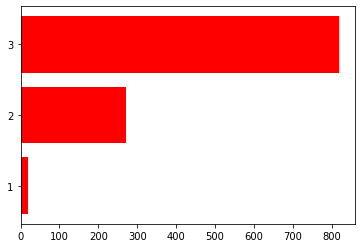

In [57]:
# Cambiamos la orientación del gráfico

plt.barh(covid_mean.Month, covid_mean.Confirmed, height= 0.8, tick_label = ["1", "2", "3"], color = 'red')
plt.show()

### Barras múltiples

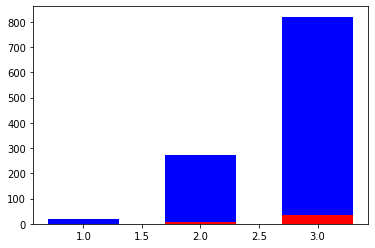

In [59]:
# Gráficos de barras múltiples 

plt.bar(covid_mean.Month, covid_mean.Confirmed, color = "b", width = 0.6)
plt.bar(covid_mean.Month , covid_mean.Deaths, color = "r", width = 0.6)
plt.show()

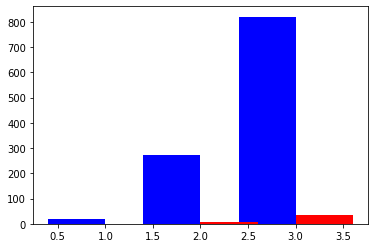

In [60]:
# Gráficos de barras múltiples con separación

plt.bar(covid_mean.Month-0.3, covid_mean.Confirmed, color = "b", width = 0.6)
plt.bar(covid_mean.Month+0.3 , covid_mean.Deaths, color = "r", width = 0.6)
plt.show()

## Histograma: plt.hist()

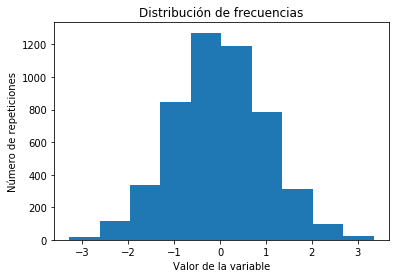

In [63]:
# Generamos bastantes valores aleatorios generados por una distribución normal estándar y los representamos en un histograma.

serie=np.random.randn(5000)
plt.hist(serie)
plt.title('Distribución de número de ocurrencias')
plt.xlabel('Valor de la variable')
plt.ylabel('Número de repeticiones')
plt.show()

**Se puede observar en el gráfico anterior que la muestra proviene de una distribución normal estandar (media 0 y varianza 1 )

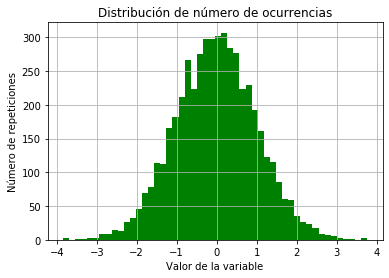

In [100]:
#Modificamos el número de bins 

serie=np.random.randn(5000)
serie=serie #Obtenemos las 
plt.hist(serie,bins=50,color='green')
plt.grid()
plt.title('Distribución de número de ocurrencias')
plt.xlabel('Valor de la variable')
plt.ylabel('Número de repeticiones')
plt.show()

## Subplots: Varios gráficos en la misma figura

**subplot(nrows, ncols, plot_number)**

**nrows**: The number of rows in the figure.

**ncols**: The number of columns in the figure.

**plot_number**: The placement of the chart (starts at 1).

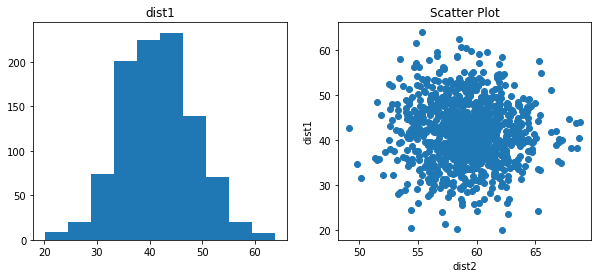

In [110]:
#Generamos muestras de dos distribuciones de probabilidad normales.
dist1 = np.random.normal(42, 7, 1000)
dist2 = np.random.normal(59, 3, 1000)

plt.figure(figsize=(10, 4)) # Se controla el tamaño del gráfico total

plt.subplot(1, 2, 1) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 1 al subplot

plt.hist(dist1)
plt.title('dist1')

plt.subplot(1, 2, 2) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 2 al subplot
plt.scatter(dist2, dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')
plt.title('Scatter Plot');


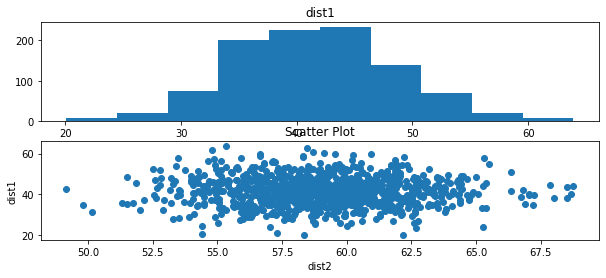

In [111]:
plt.figure(figsize=(10, 4)) # Se controla el tamaño del gráfico total

plt.subplot(2, 1, 1) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 1 al subplot

plt.hist(dist1)
plt.title('dist1')

plt.subplot(2, 1, 2) # Se define un espacio de 1 fila por dos columnas y se le asigna el número 2 al subplot
plt.scatter(dist2, dist1)
plt.xlabel('dist2')
plt.ylabel('dist1')
plt.title('Scatter Plot');

### Otros tipos de gráficos útiles

**Histogramas**

Mediante la función <b>hist,</b>, matplotlib nos permite llevar a cabo la creación de histogramas para la representación de la distribución de una variable numérica. Este conjunto de valores numéricos será el único parámetros obligatorio necesario para la creación del gráfico.

Adicionalmente, dispondremos de parámetros para controlar: número de bins del histograma, normalización del histograma (de forma que obtengamos densidades), indicación de si se debe realizar un histograma acumulativo...

La definición de la función, se puede encontrar <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.hist">aquí</a>.

**Boxplot**

En matplotlib, no podía faltar la posibilidad de generar un gráfico de boxplot. Para ello, disponemos de la función <b>boxplot</b> que recibirá un conjunto de valores sobre el que calcular los rangos, medianas, bigotes y outliers.

Dispondremos, como hasta ahora, de un conjunto amplio de parámetros opcionales que nos permitirán controlar: tipo de punto para representar outliers, control de si se muestran o no cajas y bigotes...

La documentación de la función, en <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot">este enlace</a>.

<h2>Nombres en ejes y título del gráfico</h2>

Para incluir identificaciones en los ejes y en el propio gráfico, matplotlib pone a nuestra disposición tres funciones bien diferenciadas:

<ul>
<li><b>title:</b> Título del gráfico.</li>
<li><b>xlabel:</b> Etiqueta del eje X.</li>
<li><b>ylabel:</b> Etiqueta del eje Y.</li>
</ul>

In [ ]:
plt.scatter(spain.Day, spain.Confirmed, color = "black", alpha=0.1)
plt.title("Casos confirmados en España por día", weight="bold", size=15, color = "0.3")
plt.xlabel("Día", weight="bold", size=12)
plt.ylabel("Casos confirmados", weight="bold", size=12)
plt.show()